## 1. Import Libraries

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Load the Dataset

In [146]:
df = pd.read_csv("data/Electric_Vehicle_Population_Data.csv")

In [147]:
df.shape


(166800, 17)

In [148]:
num_rows = df.shape[0]
print(num_rows)

166800


In [149]:
df.head(0)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract


In [150]:
#Get all columns
df.columns
#Dropping columns that are irrelivant to my questions
df = df.drop(["DOL Vehicle ID","County","City", "Legislative District", "Postal Code", "Vehicle Location", "Electric Utility", "State"], axis=1)
df.columns


Index(['VIN (1-10)', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', '2020 Census Tract'],
      dtype='object')

In [151]:
# FInd number of duplicates
df.duplicated().sum()

18714

In [152]:
# Remove all duplicates
df = df.drop_duplicates()

In [153]:
df.duplicated().sum()

0

In [154]:
#finds the amount of duplicates for every model that may contain different values in other columns 
# so they would not be traditional considered duplicates
df.duplicated(["Model"]).sum()


147948

In [155]:
# Removes duplicates for every model
df = df.drop_duplicates(["Model"])

In [156]:
df.duplicated(["Model"]).sum()

0

In [157]:
# Checks for null values
df.isna().sum()

VIN (1-10)                                           0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
2020 Census Tract                                    0
dtype: int64

In [158]:
Avg_range  = df["Electric Range"].mean()
print(Avg_range)

40.26086956521739


In [159]:
# Sorts the data to be by ELectric rangein descending order
df = df.sort_values(["Electric Range"], ascending=False, ignore_index=False).reset_index(drop=True)
# Gets them odels with the top 5 highest Electric ranges
Models = df["Model"].head(5)


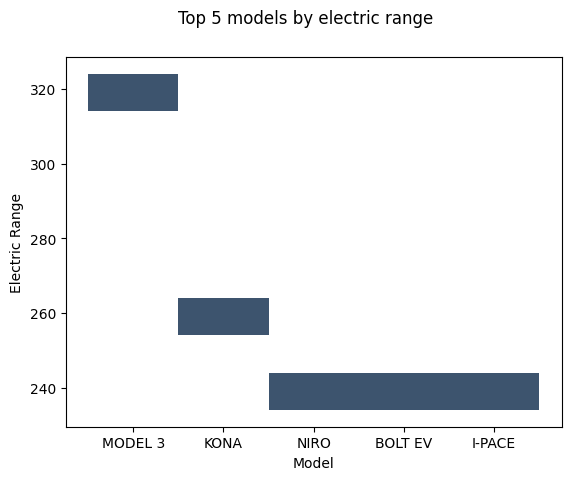

In [160]:


sns.histplot(data=df, x= Models, y= "Electric Range", binwidth =10)

plt.suptitle("Top 5 models by electric range")
plt.show()

In [161]:
Avg_price = df['Base MSRP'].mean()
print(Avg_price)
price_range = df['Base MSRP'].max() - df['Base MSRP'].min()
print(price_range)

11087.210144927536
845000


<Axes: title={'center': 'Base MSRP vs Model'}, xlabel='Model', ylabel='Base MSRP'>

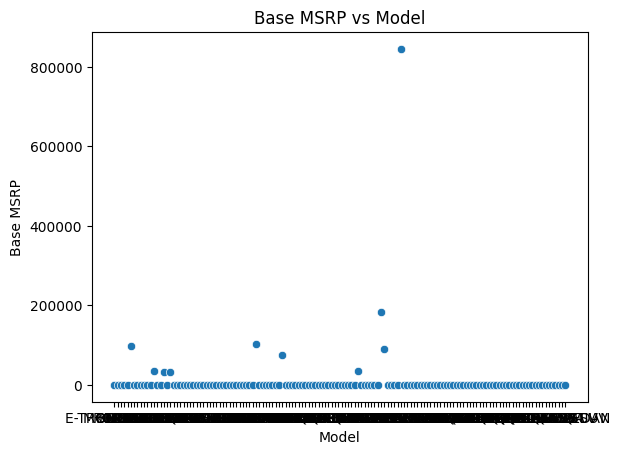

In [162]:
# Scatter plot of every model by Base MSRP
plt.title("Base MSRP vs Model")
sns.scatterplot(data=df, x= "Model", y="Base MSRP")

In [163]:
# All of the models with a Base MSRP above 0
print(df.loc[df['Base MSRP'] > 0])


    VIN (1-10)  Model Year                  Make      Model  \
5   5YJRE11B88        2008                 TESLA   ROADSTER   
12  KNDJX3AE0J        2018                   KIA    SOUL EV   
15  1W9WL21B6A        2010  WHEEGO ELECTRIC CARS     WHEEGO   
17  KNDJX3AE6G        2016                   KIA       SOUL   
43  YH4K14AA0C        2012                FISKER      KARMA   
51  LREKK5RX9J        2018              CADILLAC        CT6   
74  JF2GTDNCXK        2019                SUBARU  CROSSTREK   
81  WP0AH2A71J        2018               PORSCHE   PANAMERA   
82  WBA7J2C51J        2018                   BMW       740E   
87  WP0CA2A13F        2015               PORSCHE        918   

                     Electric Vehicle Type  \
5           Battery Electric Vehicle (BEV)   
12          Battery Electric Vehicle (BEV)   
15  Plug-in Hybrid Electric Vehicle (PHEV)   
17          Battery Electric Vehicle (BEV)   
43  Plug-in Hybrid Electric Vehicle (PHEV)   
51  Plug-in Hybrid Electric Ve

In [164]:
# Checking all of the models with a Base MSRP less than 20000
prices = df.loc[df['Base MSRP'] < 20000]
print(prices["Base MSRP"])

0      0
1      0
2      0
3      0
4      0
      ..
133    0
134    0
135    0
136    0
137    0
Name: Base MSRP, Length: 128, dtype: int64


<Axes: title={'center': 'Base MSRP vs Model (>0)'}, xlabel='Model', ylabel='Base MSRP'>

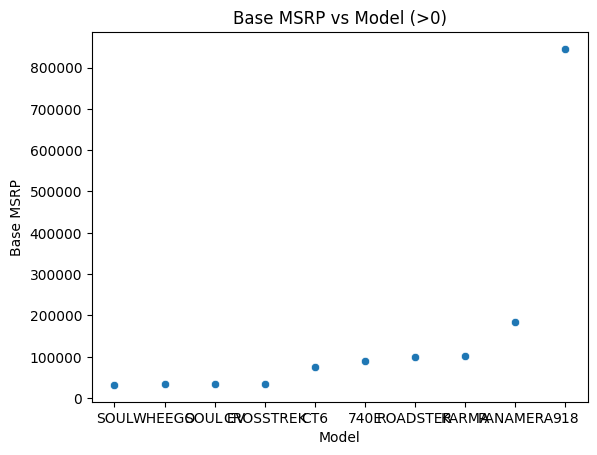

In [165]:
# Scatterplot of every model by Base MSRP with data that cotains a Base MSRP over 0
prices2 = df.loc[df['Base MSRP'] > 0]
prices2 = prices2.sort_values(["Base MSRP"], ascending=True, ignore_index=False).reset_index(drop=True)
plt.title("Base MSRP vs Model (>0)")
sns.scatterplot(data=prices2, x= "Model", y= "Base MSRP")


In [166]:
# Sorting the dataset to by by MSRP in descending order
df = df.sort_values(["Base MSRP"], ascending=False, ignore_index=False).reset_index(drop=True)
Models2 = df["Model"].head(5)

In [167]:
print(df["Model"].head(100))

0          918
1     PANAMERA
2        KARMA
3     ROADSTER
4         740E
        ...   
95          I3
96      E-GOLF
97     MODEL X
98      E-TRON
99     MODEL S
Name: Model, Length: 100, dtype: object


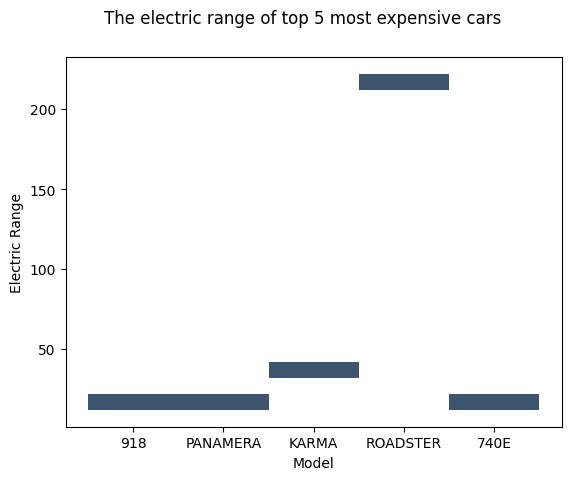

In [168]:
sns.histplot(data=df, x= Models2, y= "Electric Range", binwidth =10)
plt.suptitle("The electric range of top 5 most expensive cars ")
plt.show()

<Axes: title={'center': 'Model Year vs Model'}, xlabel='Model', ylabel='Model Year'>

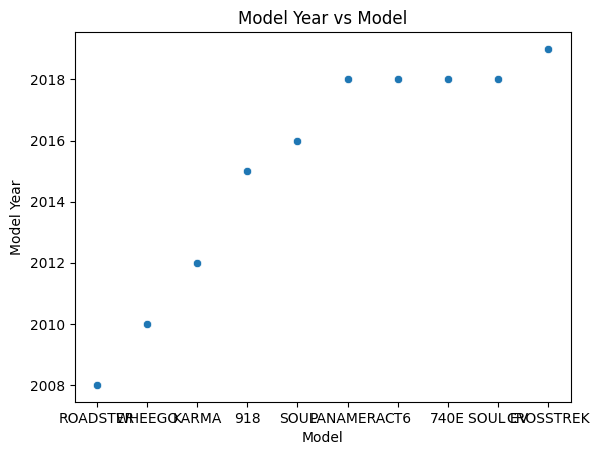

In [169]:
df = df.sort_values(["Model Year"], ascending=True, ignore_index=False).reset_index(drop=True)
plt.title("Model Year vs Model")
sns.scatterplot(data=df.loc[df['Base MSRP'] > 0], x="Model", y="Model Year")

<Axes: title={'center': 'Model Year vs Base MSRP'}, xlabel='Model Year', ylabel='Base MSRP'>

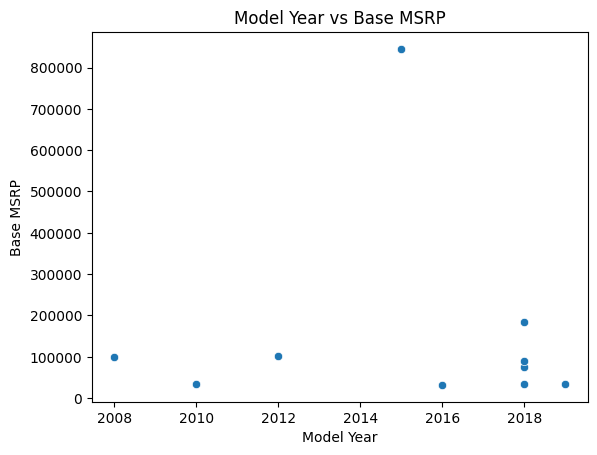

In [170]:
plt.title("Model Year vs Base MSRP")
sns.scatterplot(data=df.loc[df['Base MSRP'] > 0], x="Model Year", y="Base MSRP")

questions:
Which car has the oldest / newest model year and how does that affect price/base msrp
what was average electric range by model company and how do that compare to the most expensive cars
most and least expensive cars


What I would imporve/fix

How I would use this data